# Setting up the Environment and Importing Data

In [ ]:
import plotly.express as px
import plotly.io as pio

# This ensures Plotly output works in multiple places:
# plotly_mimetype: VS Code notebook UI
# notebook: "Jupyter: Export to HTML" command in VS Code
# See https://plotly.com/python/renderers/#multiple-renderers
pio.renderers.default = "plotly_mimetype+notebook"

## Import Libraries, Playlists, and Features

For this project, the goal was to see if I could create a model that could distinguish between the music I like and music I do not like. And if I could find a model that worked, would it help me find music from lesser-known artists that I may normally never come across? Luckily, Spotify makes this process easy with some help from the Spotipy library. The project follows through the full life cycle of a typical data science project and concludes with a final model that has helped me find new songs I  enjoy without making me listen to many songs I likely would not like. These selections are passed back to Spotify in the form of a playlist which is now part of my library. As I get more song recommendations, I can hopefully continue to narrow down what makes a song "click" for me. 

This presentation is meant to act as a streamlined version of the full project. To view the full code, please check out my Github (https://github.com/benrubinic777).
To view the created playlists, check out https://open.spotify.com/playlist/02vgoWKLijGtiqD6hLwTgX and https://open.spotify.com/playlist/1c0PzPgIKSGCESe2IEtJNf

The first step in this process was to retrieve the data from tracks that I knew I liked and tracks I knew I disliked. Luckily, I could just use playlists that I created previously to select songs I knew I liked. The hard part was finding how to collect a playlist full of songs I disliked. Fortunately, my friends have terrible tastes in music, so I was able to search through their playlists to find a good place to start. Additionally, I was able to find a variety of tracks from Spotify's created playlists. Since I knew which genres I dislike, this made the process quick. It just became a matter of selecting songs and adding them to one, large playlist. If you want to see the details of these playlists, feel free to check out my Spotify or search the playlists using the details below. 

In [35]:
# Playlist IDs for a list of playlists I like and dislike
# There are a few different ways to get the IDs of your Spotify playlists.
# I found the easiest way was to use the Spotify Web Player 
# and to select everything after the forward slash in the url: https://open.spotify.com/playlist/
# to search the playlist, just type in the URL above plus a sequence below. 
# e.g. https://open.spotify.com/playlist/6zwLst8kLfKazRv5D4B07m

good_playlist_list = ['6zwLst8kLfKazRv5D4B07m', '3zqf33EWGtjdKhRGvRRZlk', '1MrM9E65uDJ1O1KDnaKaMZ', 
                        '52IFraNVS2txBAHC6w27CS', '589IXCYLcJIEi1zykTKiDa', '3ZjXTgFmNw5XfnHqmLjolG',
                        '4vb0TPZRHAPrCt1Ccxixuz', '0k5KfueGF68BxzBN25QX3A', '1gQAw59fzdAHoSsRr3V3cy',
                        '4fPpuZqvH4i94Cqp33ry0y', '1J9BSsTPcKA55nQpCUuqRi', '3dIRjTC0Nenk1sDHSitwQv']


bad_playlist_list = ['6RT7wJWO5uxUIfhAMr1Jic']


# Data Cleaning and EDA

To avoid boring anyone with the code, I have skipped over the boring importing steps. To view the full code, check out my Github listed above.

The next step was to add the features to each track in the playlists. These features are listed below in more detail and contain information about the audio in each track. Spotify made this process easy through their audio_features function. I ran this function for both playlists. I then provided labels of "1" for liked tracks and "0" for disliked tracks to act as my target variables and joined the two dataframes. I kept (some of) the code for this section to show just how many tracks were fed through the audio_features function. I ran the data through batches of 50 tracks and then told the program to sleep to avoid issues with exceeding the API  call limit from Spotify. 

The number of liked tracks totaled 716 and the number of disliked tracks totaled 1171.

In [43]:
good_df = add_features(good_list)
bad_df = add_features(bad_list)


good_df['likable'] = 1
bad_df['likable'] = 0

print("The shape of the list of songs I like: {}".format(good_df.shape))
print("The shape of the list of songs I dislike: {}".format(bad_df.shape))

# combining the dfs
x = [good_df, bad_df]
first_df = pd.concat(x)

# Duplicates of both lists were already dropped. The below function drops any duplicates
# which were in both playlists and drops both values.
first_df = first_df.drop_duplicates(keep=False)

50 songs have been completed. 666 songs remain.
100 songs have been completed. 616 songs remain.
150 songs have been completed. 566 songs remain.
200 songs have been completed. 516 songs remain.
250 songs have been completed. 466 songs remain.
300 songs have been completed. 416 songs remain.
350 songs have been completed. 366 songs remain.
400 songs have been completed. 316 songs remain.
450 songs have been completed. 266 songs remain.
500 songs have been completed. 216 songs remain.
550 songs have been completed. 166 songs remain.
600 songs have been completed. 116 songs remain.
650 songs have been completed. 66 songs remain.
700 songs have been completed. 16 songs remain.
50 songs have been completed. 1121 songs remain.
100 songs have been completed. 1071 songs remain.
150 songs have been completed. 1021 songs remain.
200 songs have been completed. 971 songs remain.
250 songs have been completed. 921 songs remain.
300 songs have been completed. 871 songs remain.
350 songs have been c

Below is a list of the number of unique values for each feature. A few features are categorical and have a limited number of potential values. They include: key, mode, and time_signature. The rest of the variables are continuous. 

Spotify has its own way of measuring each of the features below. Here's a quick rundown from their documentation which can be found at https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features


danceability: Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. Ranges from 0.0 for least danceable to 1.0 for most danceable.

energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

duration_ms: The duration of the track in milliseconds.

time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

likable: My subjective opinion for if I like the music or not. 

id: The unique track id.

In [19]:
df.nunique()

danceability         615
energy               703
key                   12
loudness            1709
mode                   2
speechiness          728
acousticness        1325
instrumentalness    1101
liveness             688
valence              812
tempo               1826
id                  1884
duration_ms         1808
time_signature         4
likable                2
dtype: int64

For the exploratory analysis, I tried using Sweetviz for the first time. While I typically use Plotly for graphing, Sweetviz was selected so I could create a variety of graphs and discover correlations between features while only writing 5 lines of code.

The bar charts represent what percentage of each feature falls into each histogram block. The line chart represents what percentage of the values are "liked" songs. For reference, 38% of the values are liked songs. Any points above this value represent histogram bins in which I prefer the liked song to the disliked song. 

                                             |          | [  0%]   00:00 -> (? left)


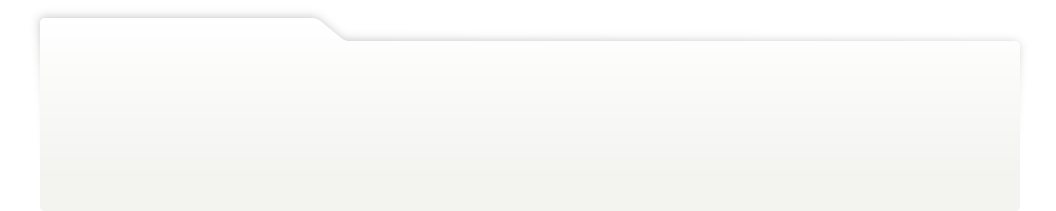
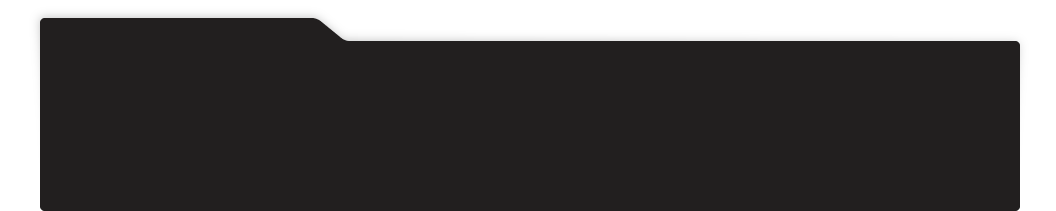
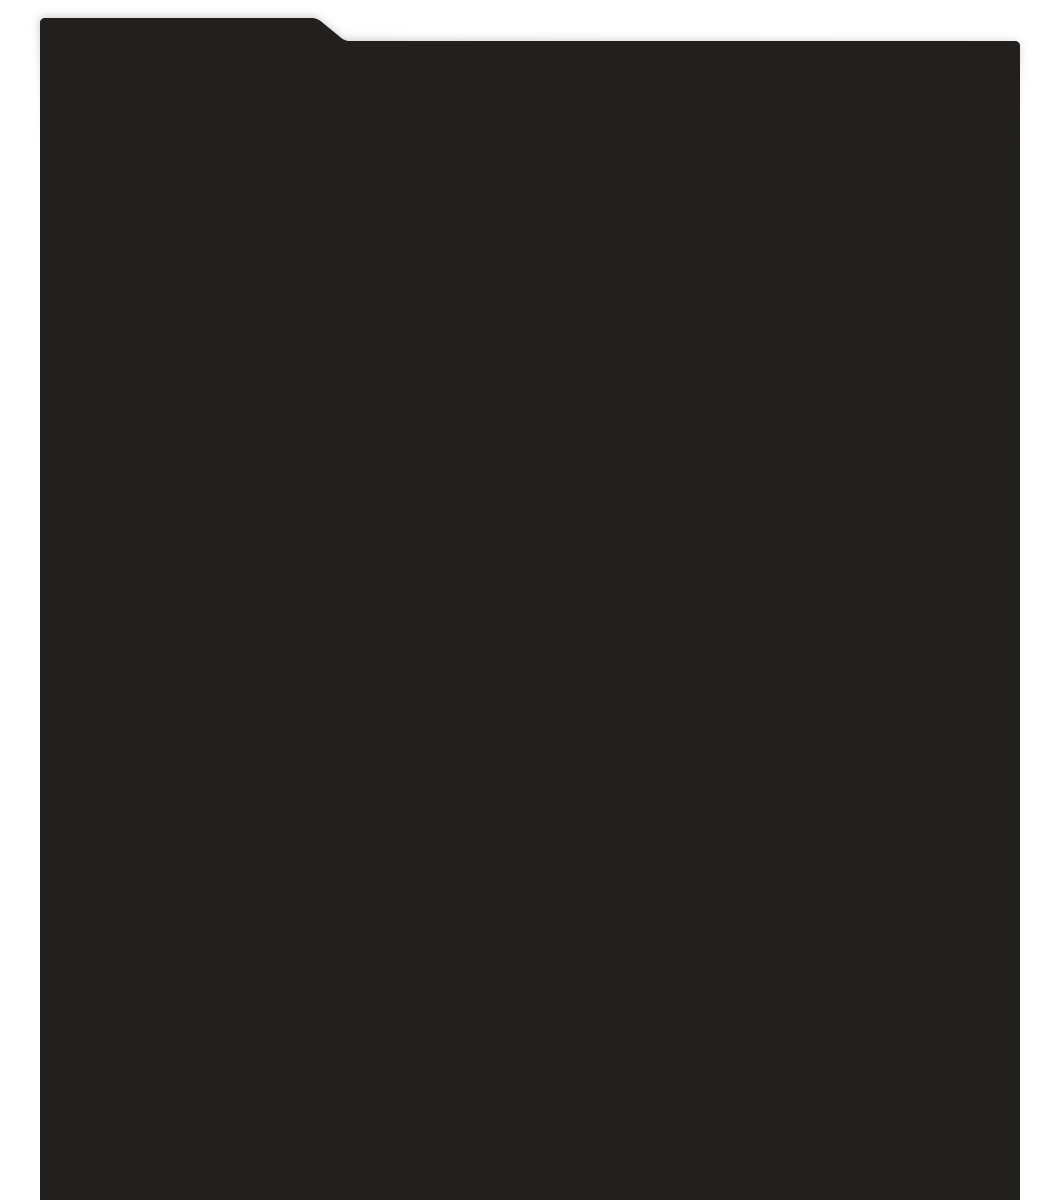
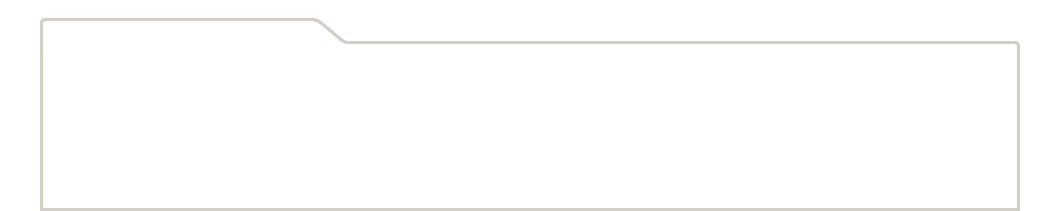
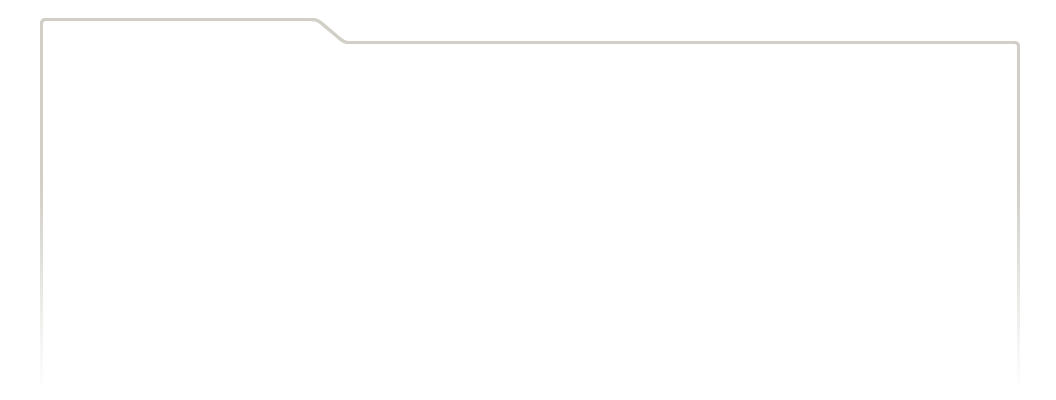
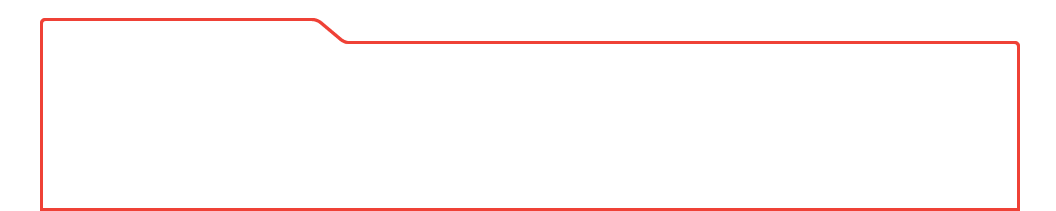
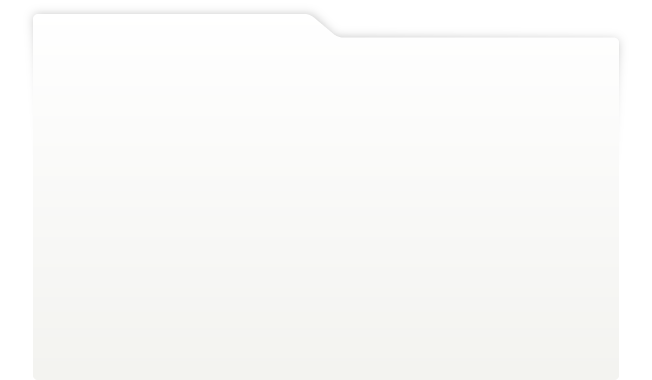
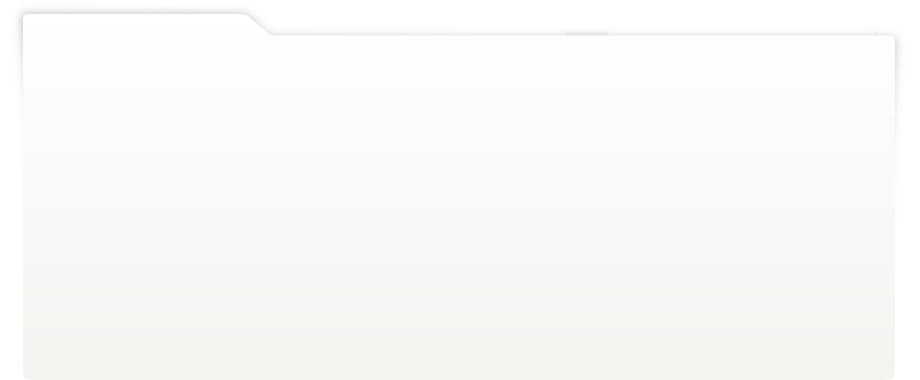
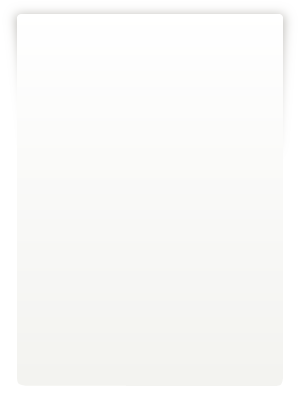
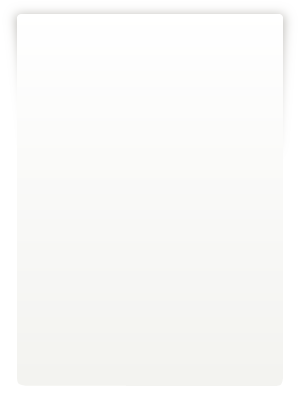
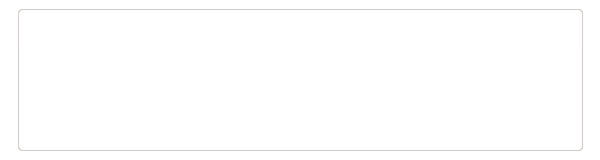
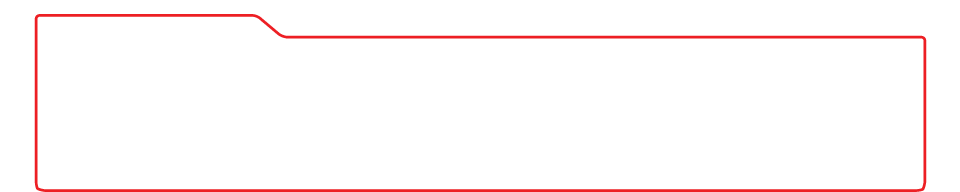
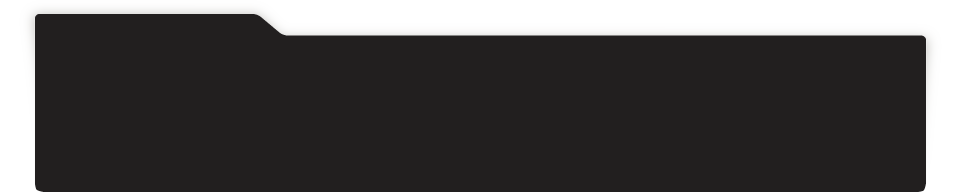
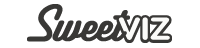
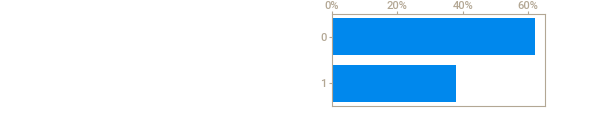
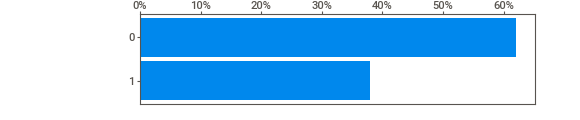
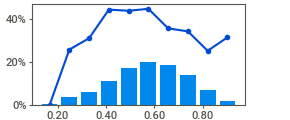
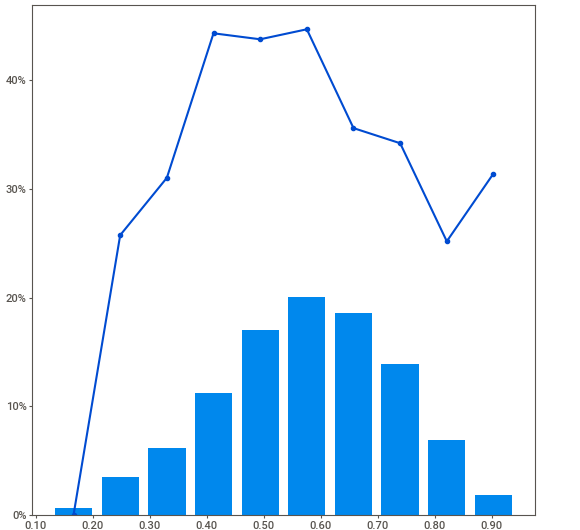
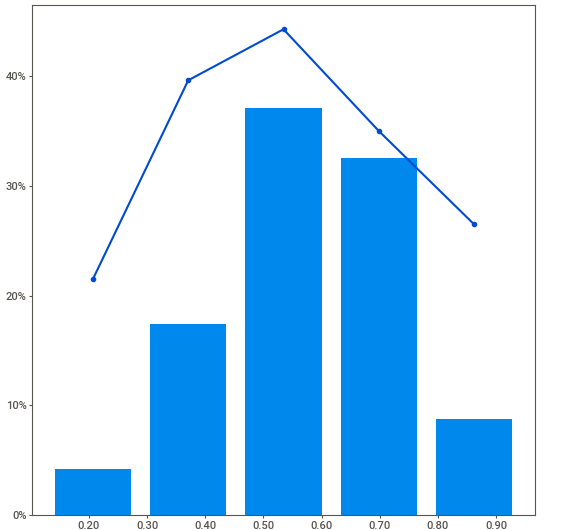
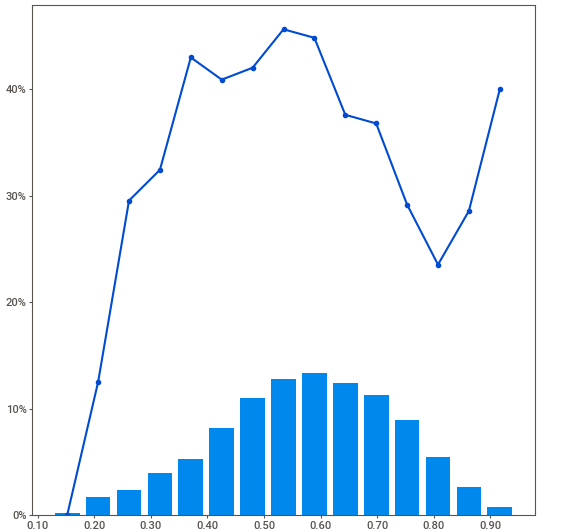
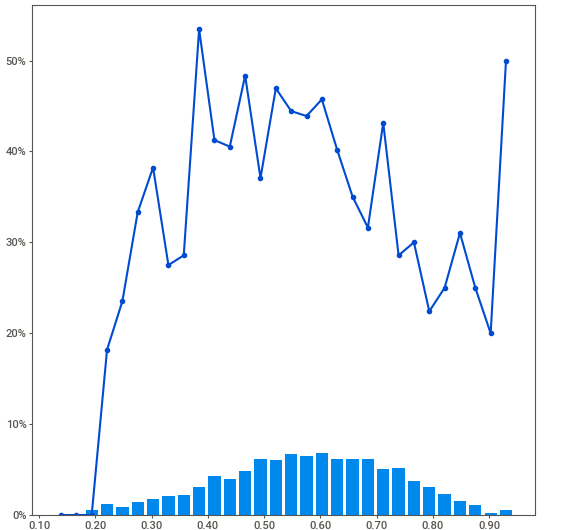
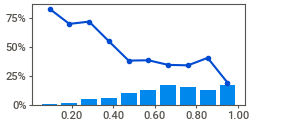
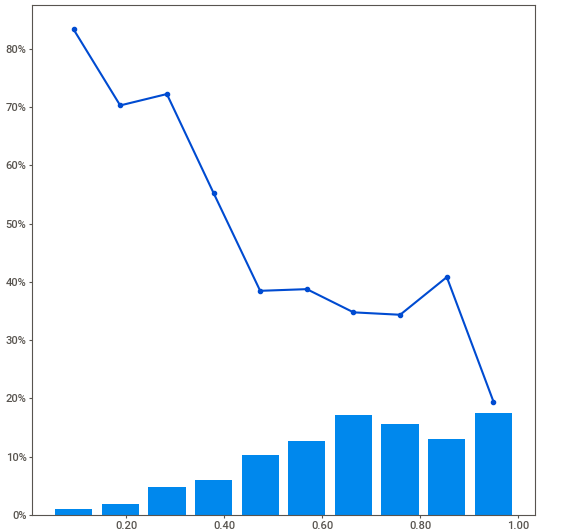
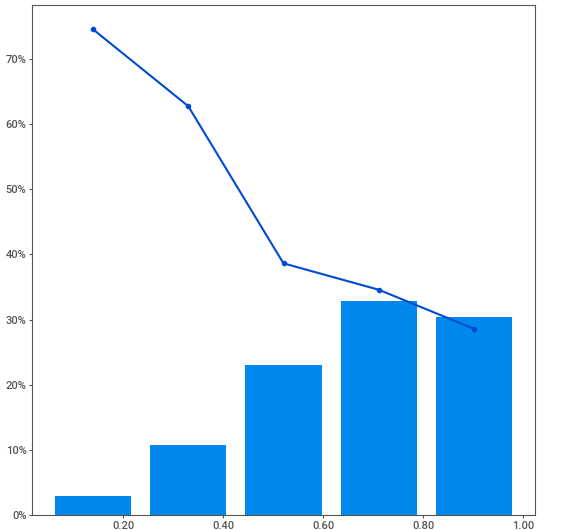
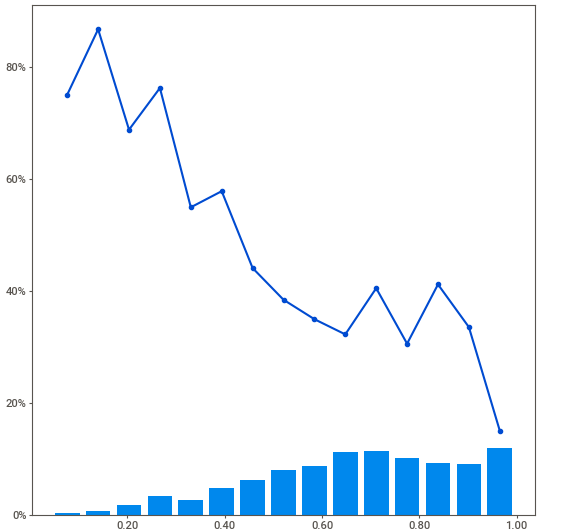
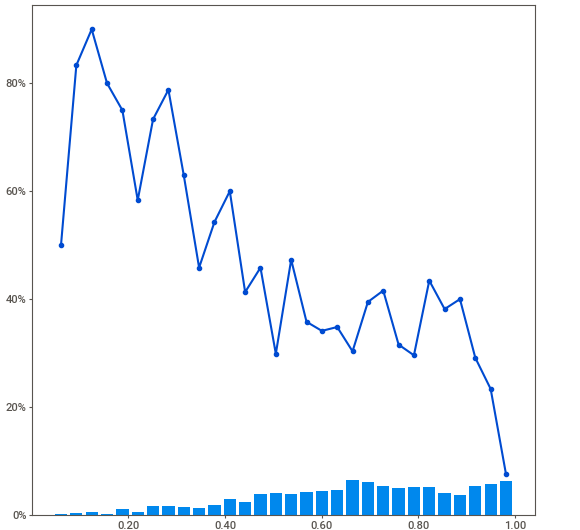
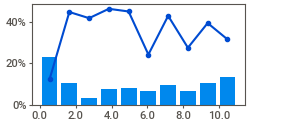
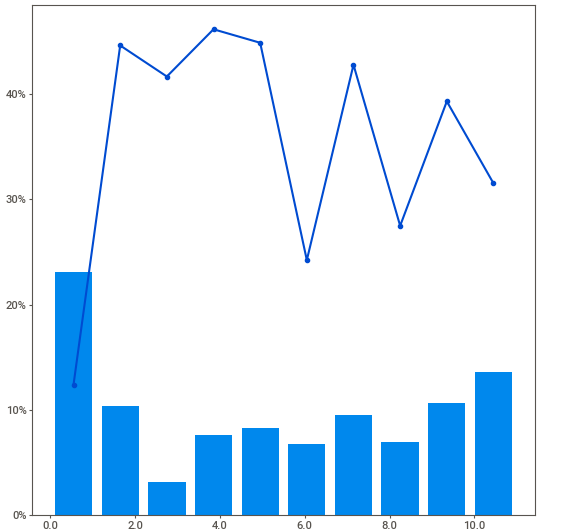
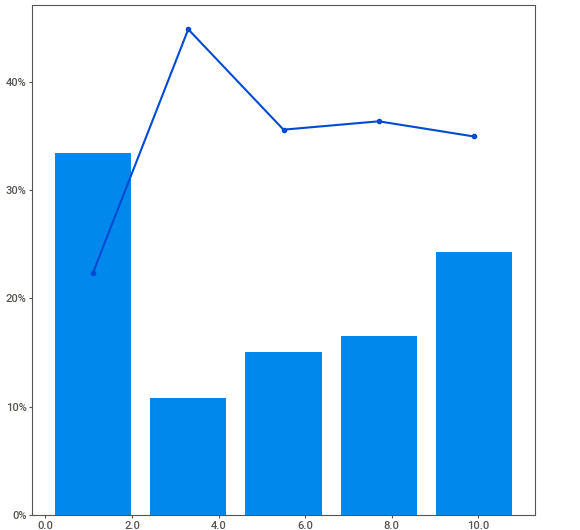
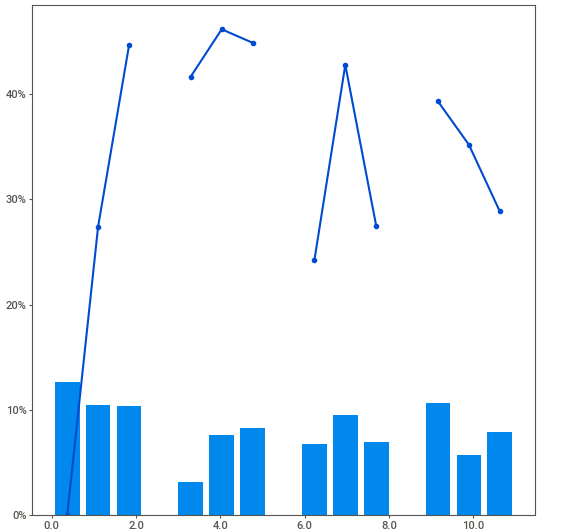
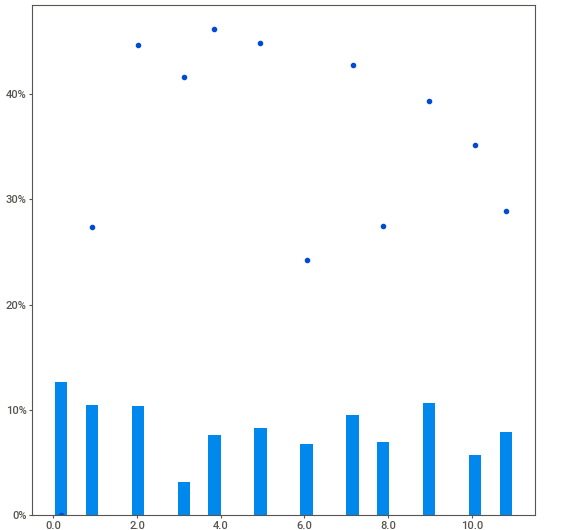
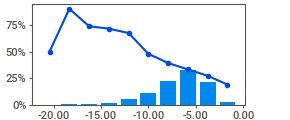
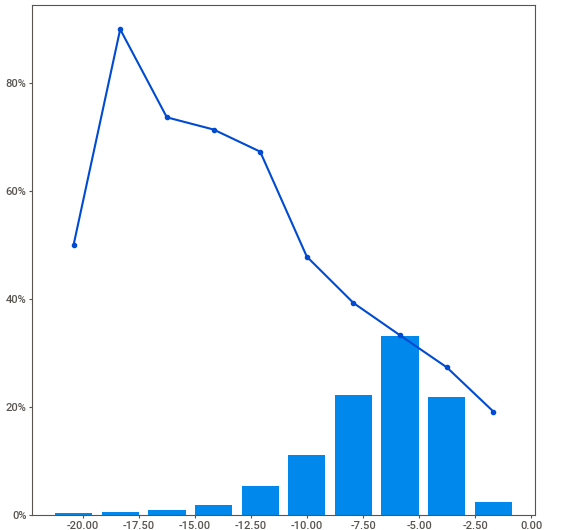
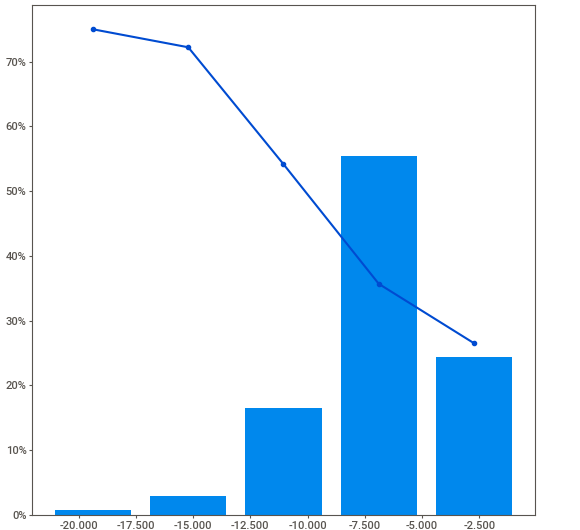
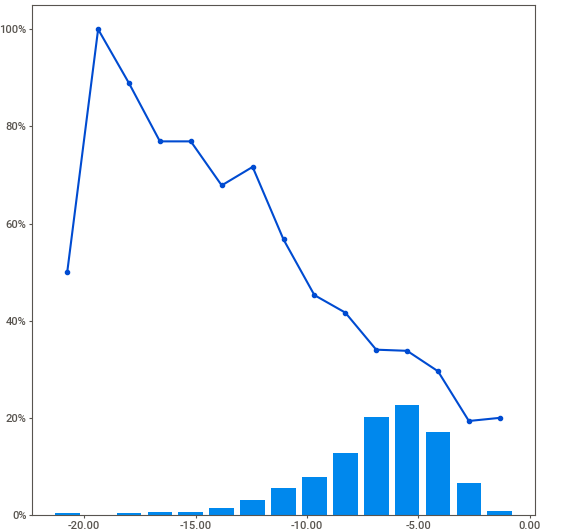
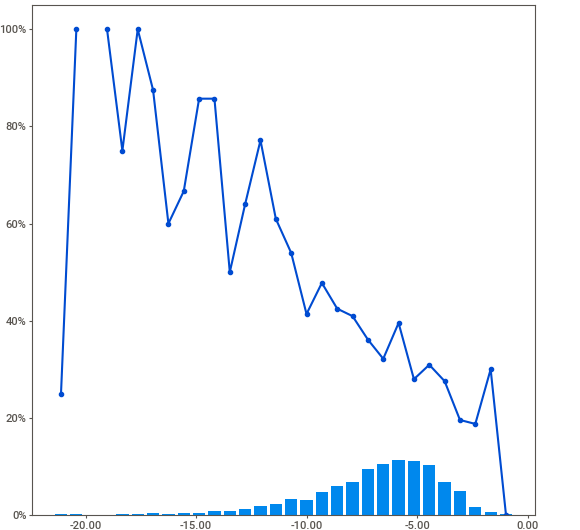
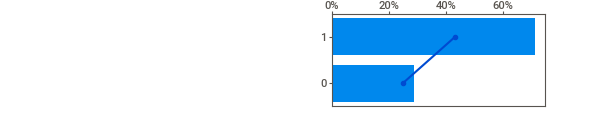
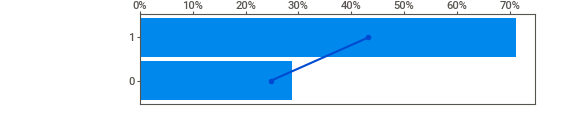
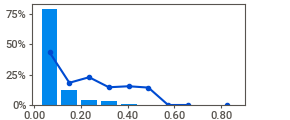
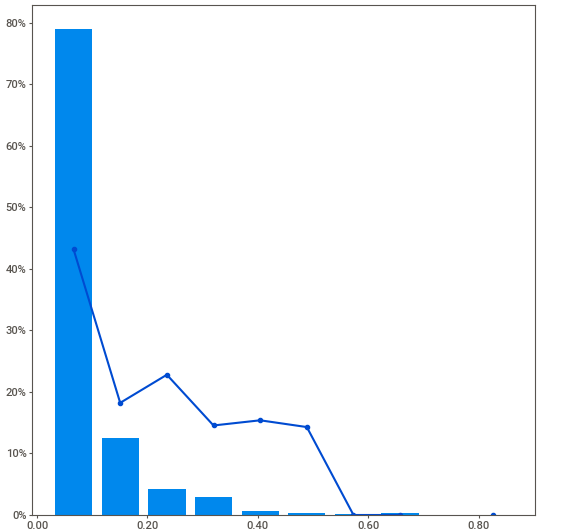
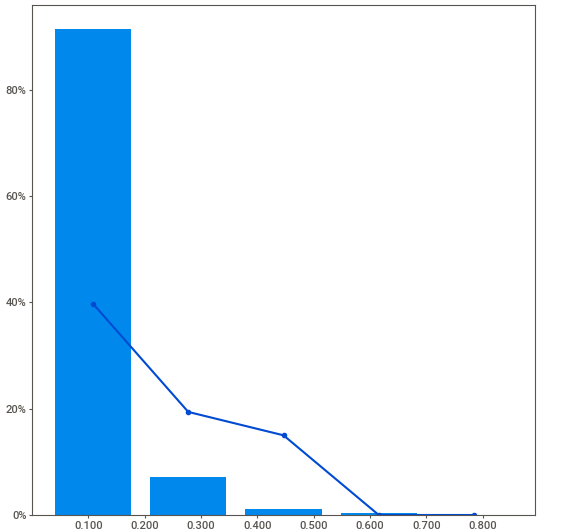
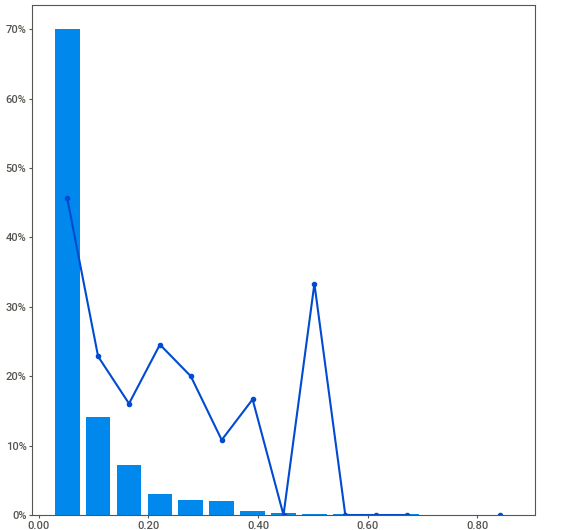
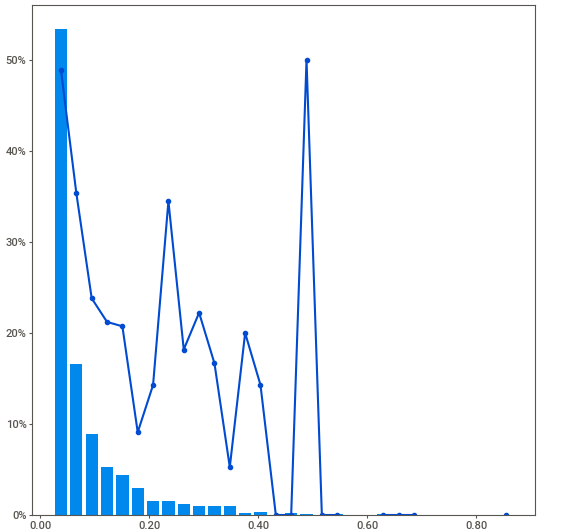
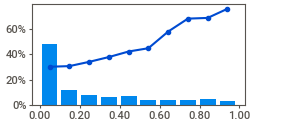
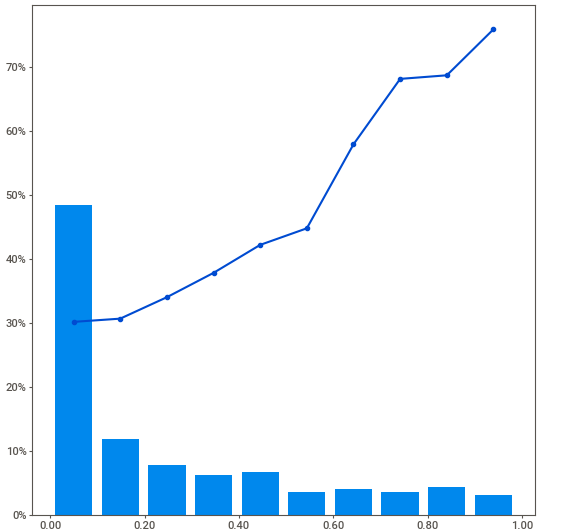
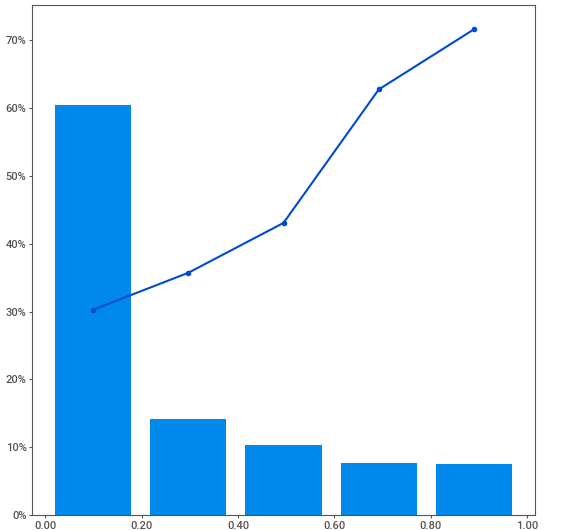
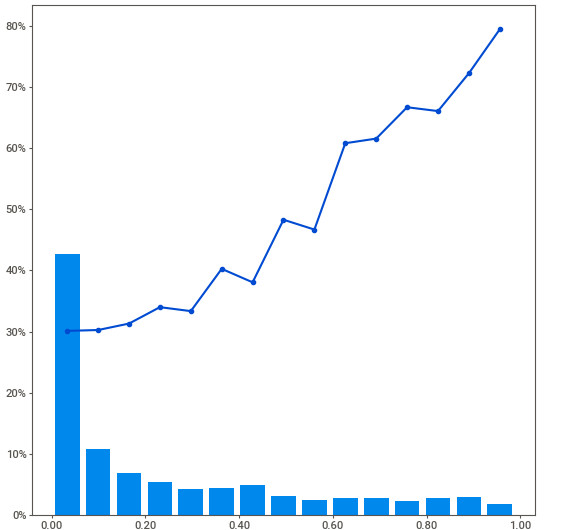
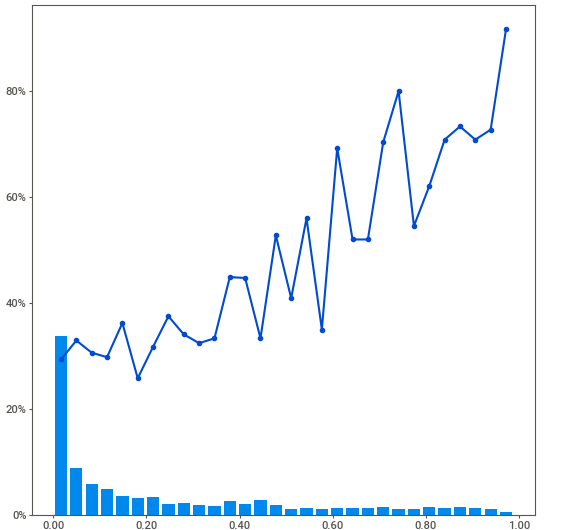
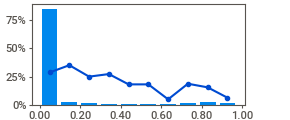
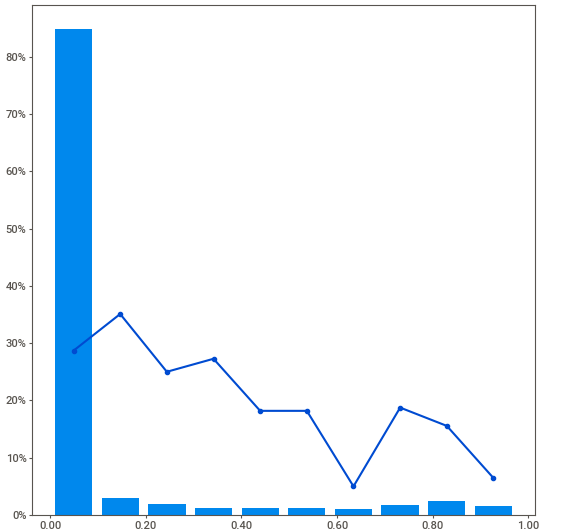
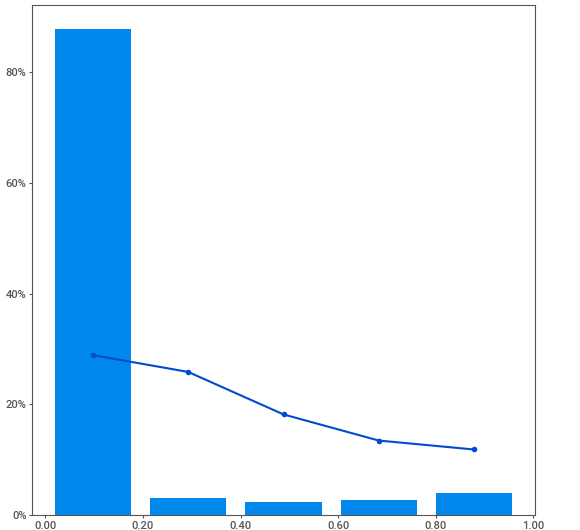
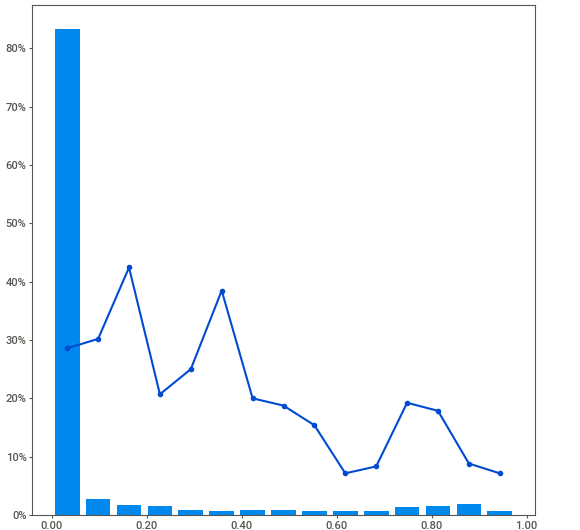
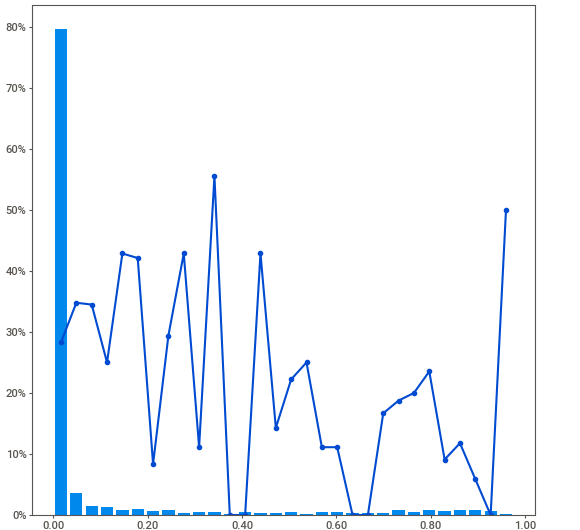
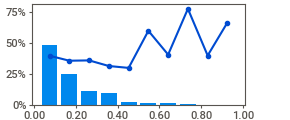
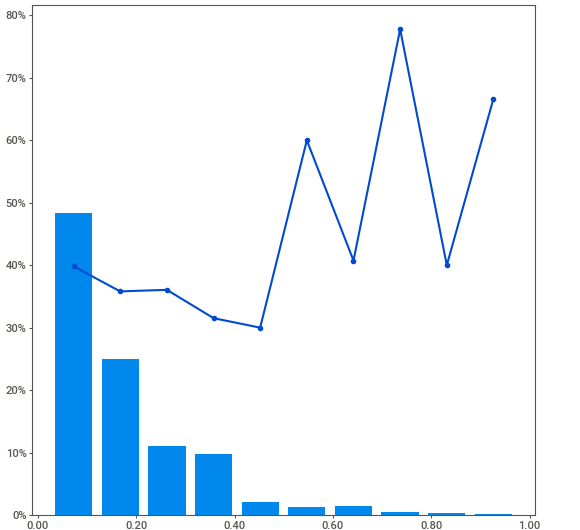
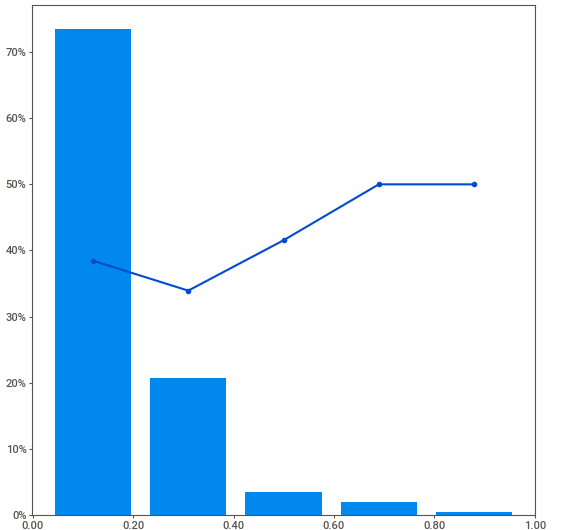
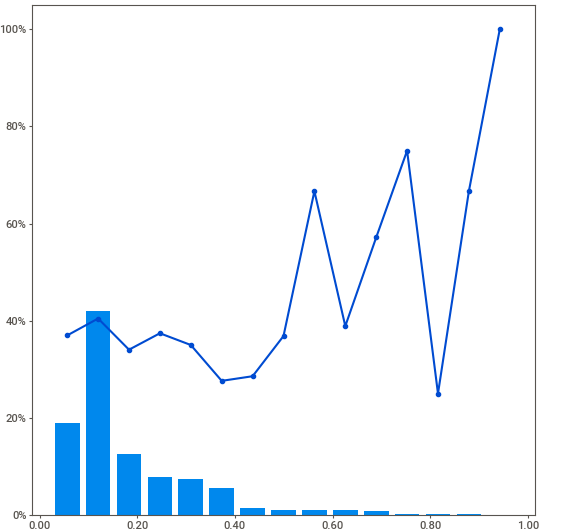
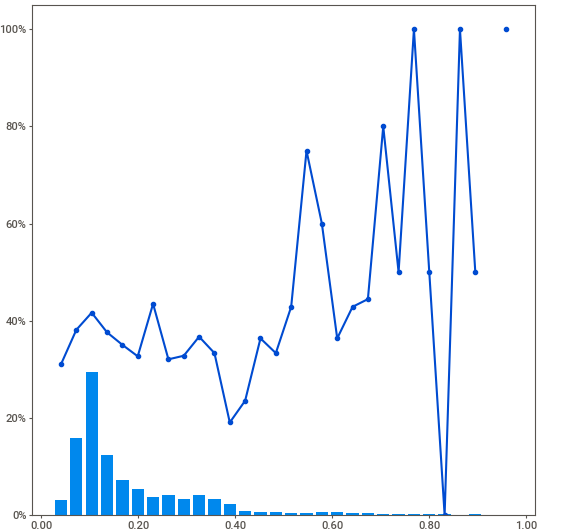
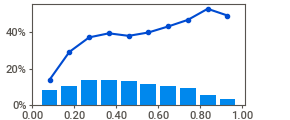
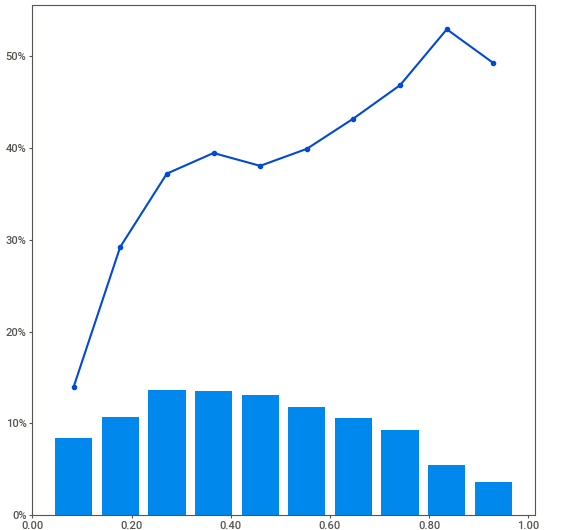
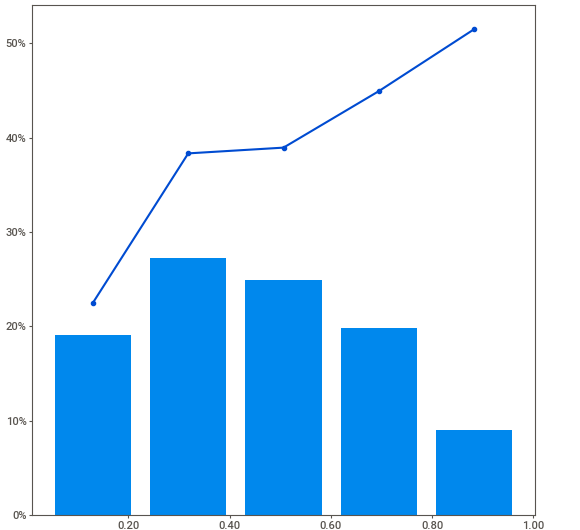
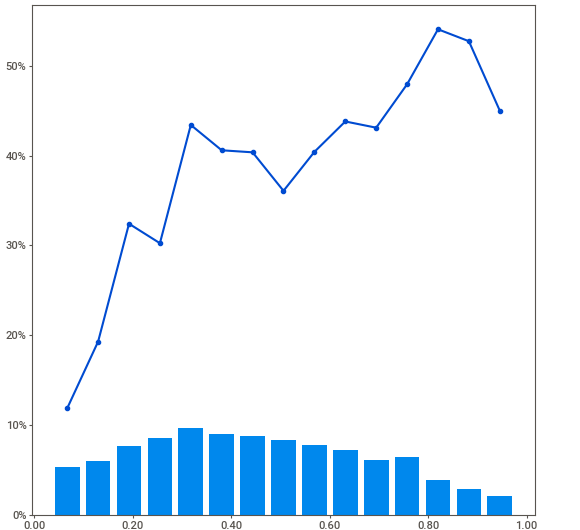
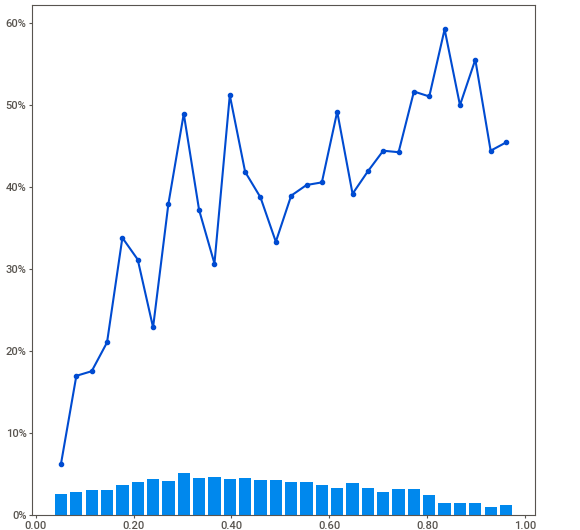
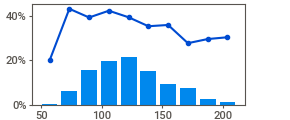
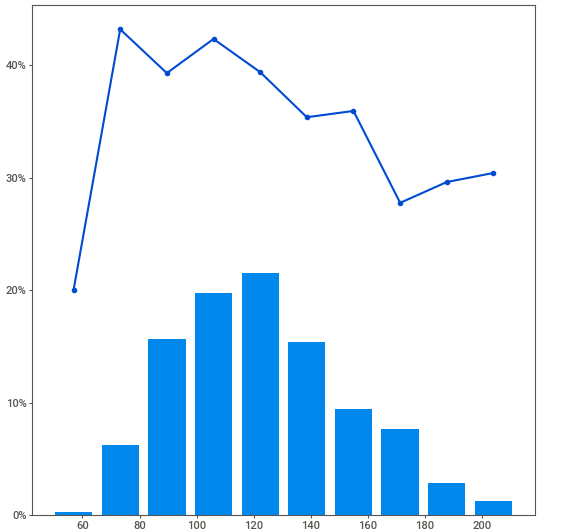
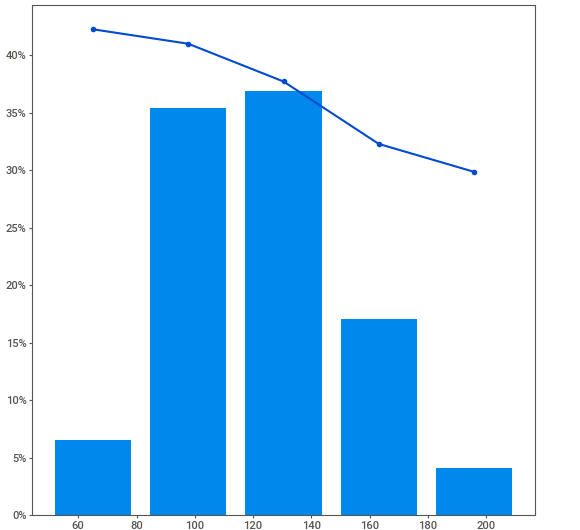
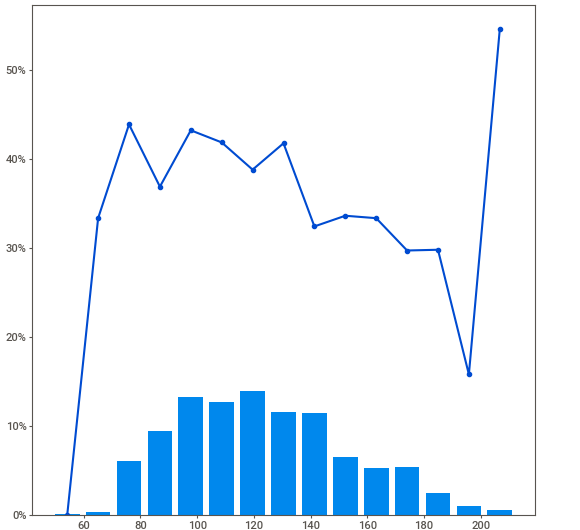
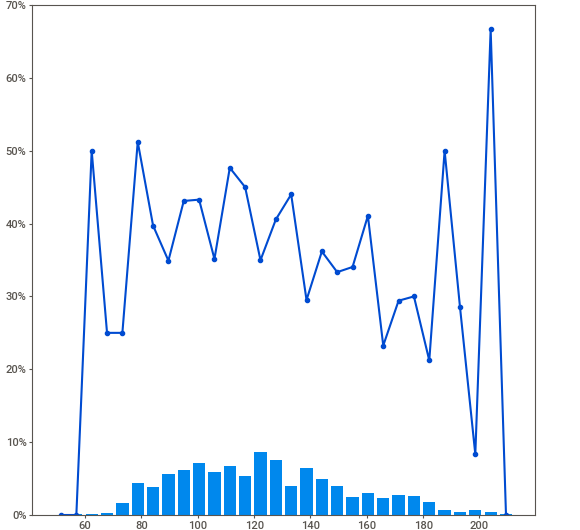
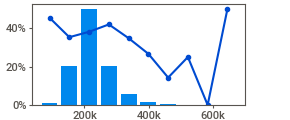
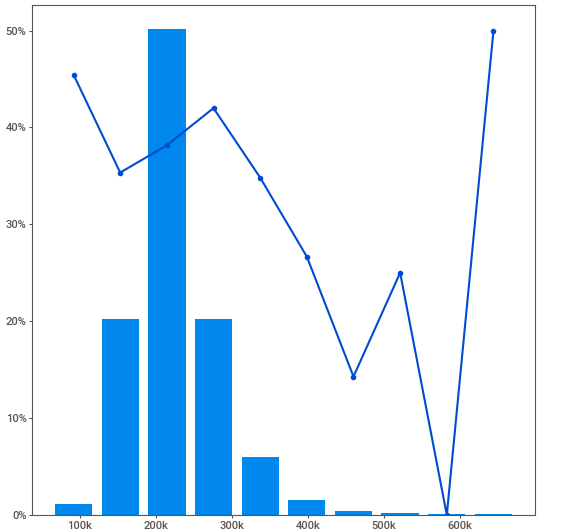
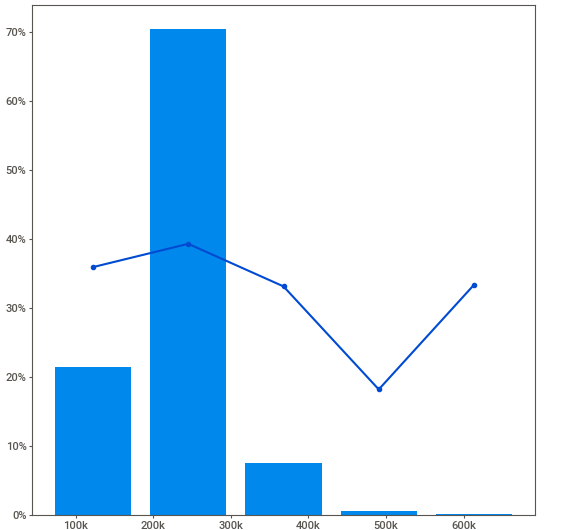
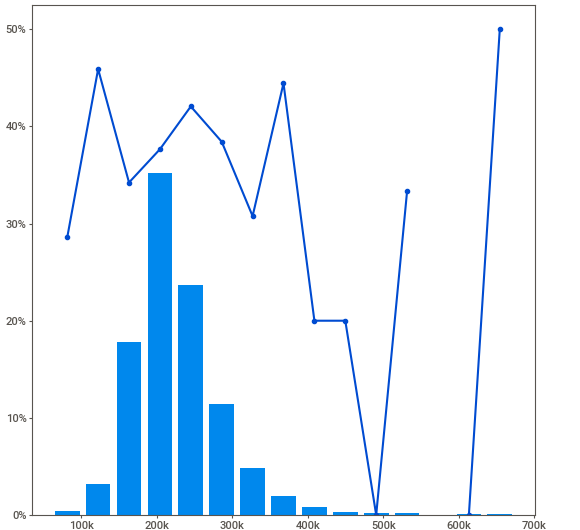
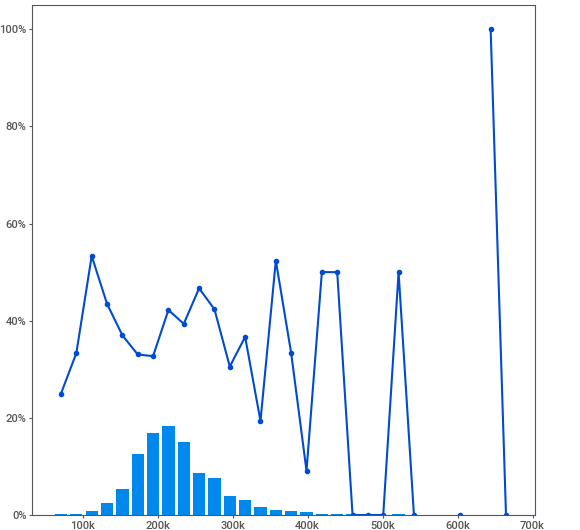
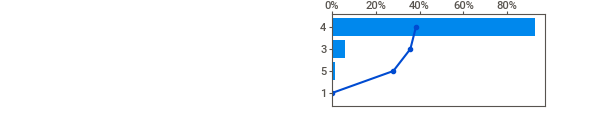
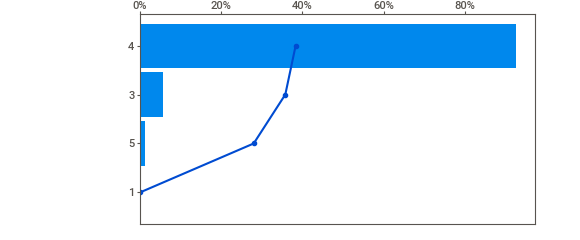
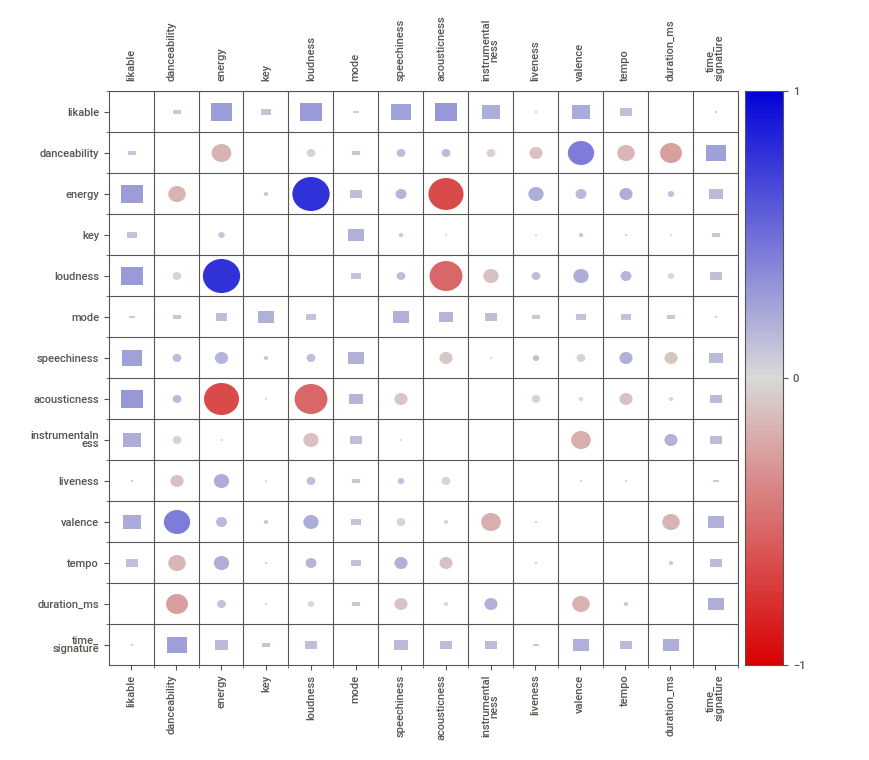
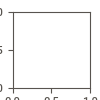

In [20]:
# For EDA, I tried Sweet Viz for the first time. I don't like the lack of customizable outputs, 
# but I think the grab-and-go version is helpful.

# The bar charts symbolize the percentage of the whole for each feature,
# and the line chart represents what percentage of the values are "liked" songs. 
# Given that 38% of the values are liked songs, anything above that represents higher than expected values.

sweetviz_df = df.copy()
sweetviz_df = sweetviz_df.drop(columns="id")

# Deprecation warnings in sweet viz are pretty common, so I surpressed them for now.
warnings.filterwarnings("ignore", category=FutureWarning)


analyze_report = sv.analyze(sweetviz_df, target_feat='likable')
analyze_report.show_notebook()

In [21]:
# One insight I found in from the previous visualizations was the spread of the acousticness feature.
# This feature represents the probability that a song is accoustic.
# To find more details, I created a violin chart from Plotly Express. 
# It appears that my liked songs have a larger spread within this feature 
# compared to disliked songs. 

fig = px.violin(df, y='acousticness', x='likable', box=True, points='all', color='likable')
fig.show()

Below is a polar chart for each feature. The points on the chart represent the average for each feature and are color-coded by the likeability of the tracks. While I think some insights can be drawn from this chart, such as the separation in valence and acousticness between features, I think the histograms above show that there is a high standard deviation for most of these features and that the average is not a good representation for the features. The histograms above provide much more relevant information for each feature. 

In [24]:
fig2 = px.line_polar(norm_mean_df, r="norm_score", theta="feature", color="likable", line_close=True,
                    color_discrete_sequence= ["lime", "red"], hover_name='norm_score', height=600,
                    title='Polar Chart of Normalized Features',
                    template="plotly_dark")

fig2.update_layout(font_family = 'Rockwell', title_x = 0.5)
fig2.update_traces(line=dict(width=2.5))
fig2.show()

For my last visualization as part of the EDA process, I wanted to know the popularity spread of the artists in the two playlists. The results were surprising to me since I thought I typically listened to less popular artists. However, it would appear that nearly 70% of the artists I listen to have a rating of 50+ for popularity. For Spotify, popularity is determined by taking the number of plays an artist's tracks get and then factoring in how recently those playes occurred. Scores of 0 are the least popular and scores of 1 are the most popular. The numbers on each bar below represent the percentage of tracks that fall into each bin.

In [25]:
fig3 = px.histogram(artist_df_import, x='artist_popularity', nbins=10, title="Histogram of Artist Popularity", 
                    labels={"artist_popularity": 'Artist Popularity'}, opacity=0.75, text_auto='.2f',
                    width=1750, height=800, color='likable', barmode="overlay", histnorm='percent')
fig3.update_layout(title_x = 0.5, title_font_family = "Arial", bargap=0.1, )
fig3.show()

# Model Building

After exploring what the features were like, I could start building a predictive model. After cleaning the data (steps not included here), I was able to scale the data and split it into training and testing sets. I saved the scaler values for later when I want to fit the scaler function on new data.

Below is a function I built to test a variety of sci-kit learn machine learning models. The function tests a variety of input hyper-parameters which were selected using a randomized search cross-validation. Instead of focusing on the F1 score or accuracy for the model, I decided to set the model to maximize precision. Precision is calculated as the number of true positives divided by the sum of the number of true positives and false positives (precision = TP/TP + FP). The reasoning behind this choice is that while I'm okay missing songs I may like (False Negatives), I want to limit the number of songs I dislike that make it through the model (False Positives). I plan on feeding the trained model with many many new songs, so by being more selective, I can (hopefully) save myself some time. 

Since I was using a randomized search cross-validation to limit the training time, I also tested the precision score when setting the model to optimize the F1 score. The results, along with a confusion matrix and the tuned hyper-parameters, are printed below. 

The model returns a precision score of 86.8% and 77.8% on the training and testing sets, respectively. This is far superior to the precision score for the F1-focused model which returned a precision score of only 57.6%. Given that there were only 24 possible combinations of hyper-parameters to tune, the model ended up performing a full grid search corss-validation. When reviewing the confusion matrix, one can see that the model mislabled a large number of songs (158) as unlikable. However, given the large number of tracks that will be fed into the model, the low number of false positives (6) is far more important and impressive. 

The ROC curve was plotted to evaluate the discrimination threshold between true positives and false positives. Additionally, the Precision/Recall curve was plotted below and is more relevant to this task. This graphic shows the cost to recall when precision is set as the preferred metric. 

In [28]:
# This code block is used to split the data into training and test sets. 
# The fit scaler model was also saved for future use. 

scaled = StandardScaler()
X_columns = df2.drop('likable', axis=1).columns
X = df2.drop('likable', axis=1).values
Y = df2['likable'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)
fit_scaler = scaled.fit(X_train)
X_train = fit_scaler.transform(X_train)

X_test = fit_scaler.transform(X_test)

scaler_file = "scaler_model.sav"
pickle.dump(fit_scaler, open(scaler_file, 'wb'))


In [29]:
def model_tester(model, parameters):
    start_time = time.time()


    # Maximizing F1
    cv_f1 = RandomizedSearchCV(model, param_distributions= parameters, cv=6, n_iter=150, scoring="f1", n_jobs=-1)
    cv_f1.fit(X_train, y_train) 
    y_pred_f1 = cv_f1.predict(X_test)   

    score_1 = round(precision_score(y_test, y_pred_f1, zero_division=0), 3)

    # Maximizing Precision
    cv_pre = RandomizedSearchCV(model, param_distributions= parameters, cv=6, n_iter=150, scoring="precision", n_jobs=-1)

    cv_pre.fit(X_train, y_train) 
    y_pred_pre = cv_pre.predict(X_test)
    y_pred_proba = cv_pre.predict_proba(X_test)

    score_2 = round(precision_score(y_test, y_pred_pre, zero_division=0), 3)

    print("Precision score for the F1 focused model: {} with {} tracks selected".format(score_1, sum(y_pred_f1)))
    print("Precision score for the precision focused model: {} with {} tracks selected".format(score_2, sum(y_pred_pre)))

    print("\nNumber of Tracks in the Training Data: {}".format(len(y_train)))
    print("Number of Tracks in Testing Data: {}".format(len(y_pred_pre)))
    
    print("\nTrue Positive Precision of Train Data: {}".format(round(cv_pre.score(X_train, y_train), 3)))
    print("True Positive Precision of Test Data: {}".format(round(cv_pre.score(X_test, y_test), 3)))
    print("\n Classification Report for the Test Data")
    print(classification_report(y_test, y_pred_pre))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pre, cmap='Blues')
    plt.grid(False)
    plt.show()
    print("Tuned Model Parameters: {}".format(cv_pre.best_params_))

    optimized_parameters = cv_pre
    execution_time = (time.time() - start_time)
    print('\nExecution Time: {} seconds'.format(str(round(execution_time, 2))))
    return optimized_parameters, y_pred_pre, y_pred_f1, y_pred_proba

c:\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning:

The total space of parameters 24 is smaller than n_iter=150. Running 24 iterations. For exhaustive searches, use GridSearchCV.

c:\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning:

The total space of parameters 24 is smaller than n_iter=150. Running 24 iterations. For exhaustive searches, use GridSearchCV.



Precision score for the F1 focused model: 0.576 with 151 tracks selected
Precision score for the precision focused model: 0.778 with 27 tracks selected

Number of Tracks in the Training Data: 1415
Number of Tracks in Testing Data: 472

True Positive Precision of Train Data: 0.868
True Positive Precision of Test Data: 0.778

 Classification Report for the Test Data
              precision    recall  f1-score   support

           0       0.64      0.98      0.78       293
           1       0.78      0.12      0.20       179

    accuracy                           0.65       472
   macro avg       0.71      0.55      0.49       472
weighted avg       0.70      0.65      0.56       472



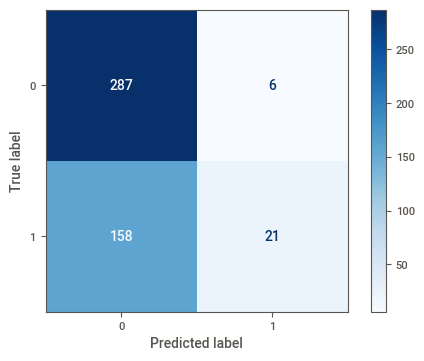

Tuned Model Parameters: {'kernel': 'sigmoid', 'gamma': 0.01, 'C': 0.1}

Execution Time: 14.99 seconds


In [30]:
parameters = {'C': [10, 1.0, 0.1, 0.01],
             'gamma': [1, 0.1, 0.01],
             'kernel': ['rbf', 'sigmoid']}

svc = SVC(probability=True)

optimized_svc, y_pred_pre, y_pred_f1, y_pred_proba = model_tester(svc, parameters)

tuned_svc = SVC(**optimized_svc.best_params_)

tuned_svc.fit(X_train, y_train)

svc_file = "svc_model.sav"
pickle.dump(tuned_svc, open(svc_file, 'wb'))

ROC AUC = 0.724


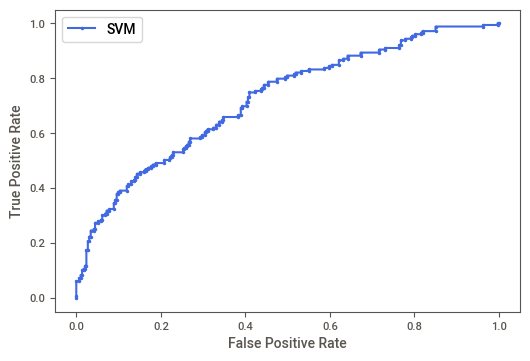

In [31]:
# The ROC AUC score is not fantastic, but I'm okay because of the focus of the model on precision.

y_pred_proba_1 = y_pred_proba[:, 1]

auc = roc_auc_score(y_test, y_pred_proba_1)

print('ROC AUC = %.3f' % (auc))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba_1)

plt.plot(fpr, tpr, marker='.', label='SVC', color="royalblue")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

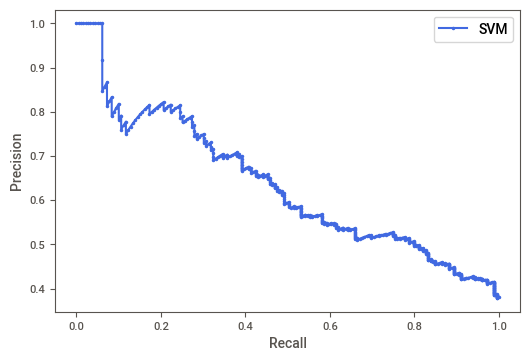

In [32]:
# It appears the model found the best value for precision within the scope of
# the precision/recall tradeoff. Once again, I care much more about precision than 
# recall for this project. 

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_1)

plt.plot(recall, precision, marker='.', label='SVC', color="royalblue")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Finding Artists, Genres, and Top Tracks

## Using Spotify's Recommendation System (Methond 1)

After the model was created, it was time to pull in unlabeled tracks from less-popular artists and pass them through the model. For reference, I included the histogram of the popularity of the tracks I like. Hopefully, the output will include data for less-popular artists. The process of selecting new data occurred in two different ways. The first was to use the Spotify recommendations function and the second was to use the Spotify's artist_related_artists function. 

The use of Spotify's recommendation system requires inputting an artist, a genre, and a track from which it provides recommendations. Multiple values for each of the aforementioned features can be passed into the recommendation function. However, I only included one to make the model a little more simple. The choice of artist was randomly selected from a list of the least-popular artists that I listen to, the genre was randomly selected from the top 20 genres that I listen to, and the track was randomly selected from a playlist of my favorite tracks. Additionally, I set the max popularity of the tracks to 20. However, Spotify takes this more as a soft request. For each combination of artist, genre, and track, the function returned up to 25 tracks. This function was run multiple times to retrieve many combinations of artists, tracks, and genres. 

The use of Spotify's artists_similar_artists function only required that I provide an artist from which to find similar artists. From there, I could select the top-10 tracks from each of these artists. I input the top-20 artists that are less popular into the model and let Spotify do its thing and pulled the tracks into a new dataframe. This process returned 3222 unique tracks. 

I left more code than normal in order to show the artists, genres, and details of how the model selected random features. 

In [ ]:
# Once again, here is a histogram of the popularity of the artists whose songs I like.

fig4 = px.histogram(artist_info, x='artist_popularity', nbins=10, title="Histogram of Artist Popularity", 
                    labels={"artist_popularity": 'Artist Popularity'}, opacity=0.75, text_auto=True,
                    width=1500, height=700)
fig4.update_layout(title_x = 0.5, title_font_family = "Arial", bargap=0.1)
fig4.show()

In [64]:
# Various Artists is provided when there are 4 or more artists credited on the track.
# Given there are some unknowns with the artists title, I dropped it from future searches. 

# I then grabbed the top-20 artists from this list for future searches. 

under_45_pop = artist_info[artist_info['artist_popularity'] < 45].reset_index(drop=True)
u_45 = under_45_pop['name'].value_counts()

artists_top_20 = list(under_45_pop['id'].value_counts().index[1:21])

u_45.head(20)


Various Artists                             12
Joe Kaplow                                   6
L.A. Salami                                  5
San Fermin                                   4
Atta Boy                                     3
Cloud Control                                2
Motherfolk                                   2
Scythian                                     2
Kiltro                                       2
Magic Man                                    2
Sonny Cleveland                              2
Walter Mitty and His Makeshift Orchestra     2
Lil Pøøch                                    2
Felix Riebl                                  2
Mantaraybryn                                 1
Mason Jennings                               1
Tanya Davis                                  1
Boom Forest                                  1
Catch 22                                     1
Toh Kay                                      1
Name: name, dtype: int64

In [65]:
# Here is a break-down of the top artist-genres that I listen to. 
# An artist can be labeled under multiple genres.

genre_list = []
genres = set_artists.artist_genre

for artist in genres:
    for i in artist:
        genre_list.append(i)

genre_ser = pd.Series(genre_list).value_counts()
print(genre_ser.head(20))

genre_top_20 = list(pd.Series(genre_list).value_counts().index[:20])

modern rock                99
stomp and holler           86
rock                       75
pop rock                   67
indie folk                 64
indie pop                  56
indie rock                 48
alternative rock           33
pop                        33
modern alternative rock    31
new americana              27
classic rock               25
permanent wave             22
deep new americana         19
folk-pop                   18
indie poptimism            18
rap                        17
indiecoustica              17
neo mellow                 16
hip hop                    16
dtype: int64


In [66]:
# Attached is a playlist full of my favorite songs. Since I needed
# songs for the function in the following code block, I figured
# I would just feed in my top songs. 

five_stars = ['5arQr8hN0f7hej3PjeEF6h']
five_stars_id = get_tracks(five_stars)

In [67]:
def get_recommendations(seed_art, seed_genre, seed_track, popularity):
    new_art_list = []
    new_track_list = []
    new_pop_list = []

    df = pd.DataFrame(columns=['artist_id', 'track_id', 'artist_popularity'])

    rand_art = seed_art[random.randint(0, len(seed_art)-1)]
    rand_genre = seed_genre[random.randint(0, len(seed_genre)-1)]
    rand_track = seed_track[random.randint(0, len(five_stars_id)-1)]

    recs = sp.recommendations(seed_artists=[rand_art], seed_genres=[rand_genre], seed_tracks=[rand_track], 
    limit=25, max_popularity = popularity)

    # Get the song's id
    data = recs['tracks']
    for i, other in enumerate(data):
        track = data[i]
        id = track['id']
        new_track_list.append(id)

    # get the song's artist id
    # get the artist's popularity
    for i, other in enumerate(data):
        track = data[i]
        artist = track['album']['artists'][0]['id']
        new_art_list.append(artist)

    
    df['artist_id'] = new_art_list
    df['track_id'] = new_track_list


    for i in df['artist_id']:
        art = sp.artist(i)
        artist_pop = art['popularity']
        new_pop_list.append(artist_pop)

    df['artist_popularity'] = new_pop_list
    return df
        


def get_more_tracks():

    df = pd.DataFrame(columns=['artist_id', 'track_id', 'artist_popularity'])
    i = 0
    while i < 40:
        recs = get_recommendations(artists_top_20, genre_top_20, five_stars_id, 20)
        df = pd.concat([df, recs])
        i += 1
        time.sleep(0.5)

    return df

## Using Less-Popular Artists to find other Less-Popular Artists (Method 2)

In [74]:
# Here is a breakdown of the track-popularity for the top tracks from the less-popular artists dataframe.
# As you can tell, it was able to find a range of less-popular tracks which I hopefully have not heard before.

fig5 = px.histogram(art_top_10, x='track_popularity', title="Histogram of Recommended Track Popularity", nbins=15,
                    labels={"track_popularity": 'Track Popularity'}, opacity=0.75, text_auto=True,
                    width=1500, height=700)
fig5.update_layout(title_x = 0.5, title_font_family = "Arial", bargap=0.1)
fig5.show()

Next, I checked to see if I had previously selected any of these tracks and if they were already in any playlists I already created. I then pulled the audio feature details and added them to each dataframe of tracks. Given the large number of tracks in each dataframe, this process took some time. 

After performing some other data cleaning, I could then pass each track through the already created model to see if I would like it or not. Both of the lists of new tracks were passed through the model. The total number of tracks labeled as likable were then printed. By inputting the tracks from Spotify's recommendation function, the model returned  27 tracks as likable. By using the tracks from similar artists, the model returned 386 tracks as likable. While these numbers are of course very different in size, the goal of this analysis wasn't to compare which method of selecting new data returned a higher percentage of tracks as likable. Thus, both methods will continue to be used in the future. Additionally, the methods returned different numbers of tracks which influenced the number of tracks labeled as likable.

In [150]:
# Now that I have all of the features added to the tracks,
# I can use my previously-created SVC model to see which songs
# I might like and to add them to a dataframe.
# Given that the creation of dummy_variables doesn't lead to the same number
# of columns if every potential dummy option is not provided, I had
# to specify potential column and merge it with the output of the get_dummies function.

scaler_file = "scaler_model.sav"
loaded_scaler = pickle.load(open(scaler_file, 'rb'))

svc_file = "svc_model.sav"
loaded_model = pickle.load(open(svc_file, 'rb'))

def cleaning_function(df):

    df = df.drop_duplicates(keep='first')
    if len(df.columns) == 19:
        df = df.iloc[: , :-1]
    df = df.dropna(how='all')
    id = list(df['id'])

    cols_to_drop = ['type', 'uri', 'track_href', 'analysis_url', 'id']
    
    df['key'] = df['key'].astype(int)
    df['time_signature'] = df['time_signature'].astype(int)



    df = df.drop(cols_to_drop, axis=1)


    dummies = ['key', 'time_signature']
    df = pd.get_dummies(df, columns=dummies, drop_first=False)

    good_columns = ['acousticness', 'danceability', 'duration_ms', 'energy',
        'instrumentalness', 'key_0', 'key_1', 'key_10', 'key_11', 'key_2', 'key_3',
        'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9',
        'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature_0', 'time_signature_1',
        'time_signature_3', 'time_signature_4', 'time_signature_5', 'time_signature_6', 
        'time_signature_7', 'valence']

    empty_df = pd.DataFrame(columns=good_columns)
    df2 = pd.merge(left=empty_df, right=df, how='outer')
    df2 = df2.drop(['key_0', 'time_signature_1'], axis=1)

    df2 = df2.fillna(0)
    print(df2.columns)
    df2 = df2.sort_index(axis=1)

    X_2 = df2.values
    scaled_X = pd.DataFrame(loaded_scaler.transform(X_2))
    predictions = loaded_model.predict(scaled_X)

    joined_df = pd.DataFrame(columns=['prediction', 'track_id'])
    joined_df['prediction'] = predictions
    joined_df['track_id'] = id

    return joined_df



In [152]:
rec_yes = rec_predictions[rec_predictions['prediction'] == 1 ]
print("Number of recommended songs from Spotify's recommendations: {}".format(len(rec_yes)))

Number of recommended songs from Spotify's recommendations: 27


In [153]:
sim_yes = sim_art_predictions[sim_art_predictions['prediction'] == 1]
print("Number of recommended songs using similar artist's top songs: {}".format(len(sim_yes)))

Number of recommended songs using similar artist's top songs: 386



Finally, the tracks labled as likable were added to a Spotify playlist if they were not already in the playlist. After running this model multiple times, I now have playlists that contain well over 24 hours worth of music for me to test out.


In [155]:
add_to_playlist(rec_yes, "02vgoWKLijGtiqD6hLwTgX")
add_to_playlist(sim_yes, "1c0PzPgIKSGCESe2IEtJNf")

Number of added Tracks: 23
Number of added Tracks: 180


While I believe the model performs well, there are still many steps I can take to improve upon it. For example, I recently discovered that I can find lyrical information from the Lyric Genius API. From there, I could use sentiment analysis, the number of unique words, or any other number of features to develop a more robust model. The current model is still returning too many tracks, and it's unlikely I will like most of the tracks provided. 

I think the next step should be to start changing the model from focusing on a binomial output to a multinomial one. Instead of saying if I like/dislike a song, I could start adding tracks to a new playlist that contains songs to which I'm indifferent. These songs would be songs that I may not skip but don't care to listen to in the future. I have a feeling that a lot of the songs which were recommended to me in the model will fall into that category. From there, I could start creating an even more specified model. Or, by inputting more information from outside sources, I could find more features which help predict the likability of a track. 

At the end of the day, however, I'm still impressed with the models Spotify creates to recommend tracks. The data they pass to developers/data scientists is such a small portion of the total pool of data from which they build their models. If you're interested in some of the techniques used by Spotify, I recommend checking out this article by Hucker Marius that breaks down some of the ways Spotify has grown to become the most popular music player. 
https://towardsdatascience.com/uncovering-how-the-spotify-algorithm-works-4d3c021ebc0

Finally, if you have any questions about some of the steps I took, have any feedback regarding the project, or have any music recommendations, please feel free to reach out to me on LinkedIn (https://www.linkedin.com/in/ben-rubinic-a17b8aa3/). The plan is to turn the final, more robust model into a bash script that I can run regularly when I feel like I'm running out of good music. If you would like the view the full code with comments, please check out my Github (https://github.com/benrubinic777).